## Detect vehicles and imputing bounding boxes in a video file.

In [1]:
#Import necessary libraries
import numpy as np
import cv2
from zipfile import ZipFile
from google.colab import drive
%matplotlib inline
from matplotlib import pyplot as plt
from IPython.display import HTML
from base64 import b64encode
from google.colab.patches import cv2_imshow
from moviepy.editor import *

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)2400256/45929032 bytes (5.2%)5775360/45929032 bytes (12.6%)8822784/45929032 bytes (19.2%)12075008/45929032 bytes (26.3%)15294464/45929032 bytes (33.3%)18776064/45929032 bytes (40.9%)21864448/45929032 bytes (47.6%)25223168/45929032 bytes (54.9%)28598272/45929032 bytes (62.3%)31768576/45929032 bytes (69.2%)34955264/45929032 bytes (76.1%)38117376/45929032 bytes (83.0%)

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Extract zip folder containing video files

with ZipFile('/content/drive/MyDrive/Great Learning/Computer Vision/Assignment 9 -Face Detection /Part 4 Video.zip', 'r') as zf:
  zf.extractall()

In [4]:
#Clip the first few seconds of video1 and save it in drive
clip = VideoFileClip("/content/Video/video1.mp4").cutout(0, 9)
clip.write_videofile("/content/Video/video1_test2.mp4")

[MoviePy] >>>> Building video /content/Video/video1_test2.mp4
[MoviePy] Writing audio in video1_test2TEMP_MPY_wvf_snd.mp3


100%|██████████| 1553/1553 [00:01<00:00, 1333.28it/s]

[MoviePy] Done.
[MoviePy] Writing video /content/Video/video1_test2.mp4



100%|██████████| 2381/2381 [00:39<00:00, 59.63it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /content/Video/video1_test2.mp4 



In [ ]:
#Variable definition
video_path= '/content/Video/'
FILE_1= 'video1_test2.mp4'
FILE_2= 'video2.mp4'

In [58]:
#This function will capture video frame by frame and save the frames in a list. It accepts the file name from calling function.

def createFrames(fileName):
  frames=[]
  filePath = video_path+fileName
  print(filePath)
  #Capture the video 
  video_stream = cv2.VideoCapture(filePath)
  #get the count of frames
  total_frames=video_stream.get(cv2.CAP_PROP_FRAME_COUNT)
  total_frames=int(total_frames)
  print(total_frames)
  #Read and save frames
  for fmId in range(total_frames):
    video_stream.set(cv2.CAP_PROP_POS_FRAMES, fmId)
    ret, frame = video_stream.read()
    frames.append(frame)
  return frames

In [59]:
#Video 1
frames= []
frames= createFrames(FILE_1)

/content/Video/video1_test2.mp4
2381


In [63]:
#Video 2
frames_2= []
frames_2= createFrames(FILE_2)

/content/Video/video2.mp4
3407


In [66]:
#The output video file where the video with bounding boxes has to be saved.
writer = cv2.VideoWriter("/content/Video/output2.mp4", 
                         cv2.VideoWriter_fourcc(*"MP4V"), 30,(640,480))

In [67]:
masks= []
pick=[]
#createBackgroundSubtractorMOG2 will eliminate background and highlight the objects in foreground.
BGImage = cv2.createBackgroundSubtractorMOG2(history = 500, varThreshold = 16, detectShadows = False)
for i, frame in enumerate(frames_2):
  #Apply background eliminattion process to each frame
  mask = BGImage.apply(frame)
  masks.append(mask)
  #Threshold will keep pixels intact that are mentioned in the range. For us,the foreground is in white, so will maintain all objects in mask in white.

  _,mask= cv2.threshold(mask,254,255,cv2.THRESH_BINARY)
  #Find the contouring pixels of each object in mask
  contours,_ = cv2.findContours(mask,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
  #for each contours, we will take the area and select and impute bounding boxes on objects that have area more than 500.
  for cnt in contours:
    area=cv2.contourArea(cnt)
    if area > 500:
      x,y,w,h = cv2.boundingRect(cnt)
      #cv2.drawContours(frame,[cnt],0, (0,255,0),2)
      cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
      #cv2.rectangle(roi,(new_x1,new_y1),(new_x2,new_y2),(0,255,0),2)
    #write the frame to writer object
  writer.write(cv2.resize(frame,(640,480)))

#Release all objects created 
video_stream.release()
writer.release()

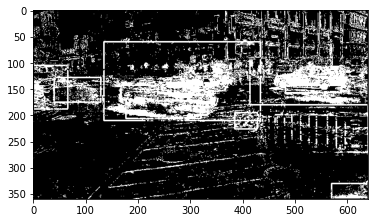

In [68]:
#Sample of masks create createBackgroundSubtractorMOG2
plt.imshow(masks[100],cmap='gray')